In [1]:
import os

# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import PIL.Image
from tqdm.notebook import tqdm, trange
import glob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from IPython.display import Image as IImage
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
tqdm.pandas()

In [2]:
from sentence_transformers import SentenceTransformer, util
embedder = SentenceTransformer('all-MiniLM-L6-v2')


In [3]:
print(os.listdir('/raid/AISSEL/Hamed/datasets/'))

['ECP_day_img_train.zip', 'text', 'WiderPerson.zip', 'CrowdHuman.bk', 'mm_bk', 'vg', 'README', 'license.txt', 'bdd100k_images_100k.zip', 'wit', 'caption_data', 'caption_data_org', 'Calculations.xlsx', 'ped_google', 'google_images.tsv', 'google_images_with_prediction.tsv', 'google_images.pk', 'google_images_with_prediction.pk', '__MACOSX', 'missing_topic', 'google_images_with_prediction_base.pk', 'google_images_with_prediction_base_missed.pk', 'ped_google.zip']


In [4]:
d_path = '/raid/AISSEL/Hamed/datasets'
# df = pd.read_pickle(f'{d_path}/google_images_with_prediction.pk')
# df = pd.read_pickle(f'{d_path}/google_images_with_prediction_base.pk')
df = pd.read_pickle(f'{d_path}/google_images_with_prediction_base_missed.pk')
df

,topic,caption,context,tag,query_gt,gt_coverage,image,ofa_caption
0,309,Police are calling for public assistance after...,Police areseeking public help after a man alle...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,people wearing face masks walk outside a train...
1,309,Passengers are waiting to bord train.,The Victorian Minister for Transport Infrastru...,"[pedestrian:1, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a crowd of people waiting for the train to arr...
2,309,"Box Hill’s $754,000 footbridge across the tracks",This is the story of the $56.5 million grade s...,"[pedestrian:0, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.500000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a train passes under the pedestrian bridge ove...
3,309,Metro Trains have so far been unable to say wh...,Metro Trains have so far been unable to say wh...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a train arrives at a station in the city of vi...
4,309,"The Electric Tilt Train, the fastest train in ...",High-speed rail in Australia has been under in...,"[pedestrian:1, close:1, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A yellow train on the tracks at the station
...,...,...,...,...,...,...,...,...
306,99,ARCE Students Place Second in EERI Seismic Des...,A team of Cal Poly architectural engineering (...,"[pedestrian:0, structure:1, concrete:0, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,people working on the construction of a wall
307,99,Timber Strong Provides Real-World Engineering ...,"For the last three years, Simpson Strong-Tie h...","[pedestrian:1, structure:0, concrete:1, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.222222,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A group of people posing for a picture in fron...
308,99,"Students Compete to Design, Build Timber Struc...",Hammer strikes echoed through the sunny plaza ...,"[pedestrian:1, structure:1, concrete:1, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.666667,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,pedestrians walking on the sidewalk in front o...
309,99,Cal Poly Architectural Engineering Students Wi...,SAN LUIS OBISPO – Six Cal Poly architectural e...,"[pedestrian:1, structure:1, concrete:1, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.888889,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A group of people standing on top of a box


In [5]:
pd.set_option('display.max_rows', None)
ofa_cap = df[['ofa_caption']]
ofa_cap

,ofa_caption
0,people wearing face masks walk outside a train...
1,a crowd of people waiting for the train to arr...
2,a train passes under the pedestrian bridge ove...
3,a train arrives at a station in the city of vi...
4,A yellow train on the tracks at the station
5,A train on the tracks at the train station in ...
6,A cyclists crossing the street in front of a p...
7,A traffic on the freeway in china is seen in t...
8,a city bus is parked on the street in front of...
9,pedestrians wait to cross the street at a pede...


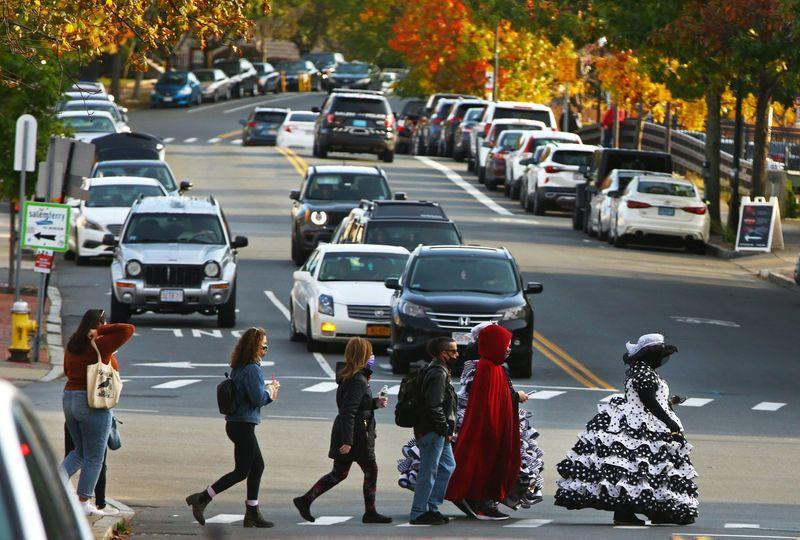

In [31]:
# df_test.at[1,'image']
import base64

image_64_decode = base64.b64decode(df.at[77,'image']) 
image_result = open('deer_decode.jpg', 'wb') # create a writable image and write the decoding result
image_result.write(image_64_decode)
from IPython.display import Image as IImage
IImage(filename='deer_decode.jpg') 

In [32]:
df.at[77,'ofa_caption']

'pedestrians crossing the street in front of a parking lot'

In [8]:
def get_sim(u,v):
    emb1 = embedder.encode(u)
    v = ' '.join(v)
    emb2 = embedder.encode(v)
    
    return float(util.cos_sim(emb1, emb2)[0][0])

In [9]:
df['tag'] = df['tag'].astype('object')
df['query_gt'] = df['query_gt'].astype('object')


In [10]:
df.at[1, 'tag']

['pedestrian:1', 'close:0', 'rail:1', 'train:1', 'railway:1', 'line:1']

In [11]:
pedestrian_list = ['people', 'someone', 'individual', 'worker', 'child', 'human', 
                   'somebody', 'man', 'boy', 'human', 'person', 'mankind', 
                   'humankind', 'guy', 'gentleman', 'someone', 'girl', 'men', 
                   'woman', 'women', 'lady', 'madam', 'pedestrian', 'kid']

In [12]:
def simple_search(context, t):
    percentage = 0
    for w in t:
        if w in context:
            percentage = percentage + 1
    return float(percentage/len(t))

In [13]:
def flag_search(context, t):
    for w in t:
        if w in context:
            return float(1)
    return float(0)

In [14]:
def flag_search_gt(tag, t):
    gt_obj = []
    for el in tag:
        k, v = el.split(':', 1)
        k = k.strip()
        v = int(v.strip())
        if v:
            gt_obj.append(k)
    context = ' '.join(gt_obj)
        
    for w in t:
        if w in context:
            return float(1)
    return float(0)

In [15]:
tag = ['pedestrian:0', 'close:0', 'rail:1', 'train:1', 'railway:1', 'line:1']

print(flag_search_gt(tag, pedestrian_list))

0.0


In [16]:
df['gt_cap_cov'] = df.apply(lambda x: simple_search(x.caption, x.query_gt), axis=1)
df['gt_con_cov'] = df.apply(lambda x: simple_search(x.context, x.query_gt), axis=1)
df['ofa_cap_cov'] = df.apply(lambda x: simple_search(x.ofa_caption, x.query_gt), axis=1)
df['gt_cap_sim'] = df.apply(lambda x: get_sim(x.caption, x.query_gt), axis=1)
df['gt_con_sim'] = df.apply(lambda x: get_sim(x.context, x.query_gt), axis=1)
df['ofa_cap_sim'] = df.apply(lambda x: get_sim(x.ofa_caption, x.query_gt), axis=1)
df['ofa_ped_sim'] = df.apply(lambda x: get_sim(x.ofa_caption, ['pedestrian']), axis=1)
df['gt_ped_sim'] = df.apply(lambda x: get_sim(x.caption, ['pedestrian']), axis=1)

In [17]:
df['ofa_ped_flag'] = df.apply(lambda x: flag_search(x.ofa_caption, pedestrian_list), axis=1)
df['gt_ped_flag'] = df.apply(lambda x: flag_search_gt(x.tag, pedestrian_list), axis=1)

In [18]:
df['gt_cap_flag'] = df.apply(lambda x: flag_search(x.caption, pedestrian_list), axis=1)
df['gt_con_flag'] = df.apply(lambda x: flag_search(x.context, pedestrian_list), axis=1)

In [19]:
df

,topic,caption,context,tag,query_gt,gt_coverage,image,ofa_caption,gt_cap_cov,gt_con_cov,ofa_cap_cov,gt_cap_sim,gt_con_sim,ofa_cap_sim,ofa_ped_sim,gt_ped_sim,ofa_ped_flag,gt_ped_flag,gt_cap_flag,gt_con_flag
0,309,Police are calling for public assistance after...,Police areseeking public help after a man alle...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,people wearing face masks walk outside a train...,0.166667,0.333333,0.166667,0.356298,0.284414,0.368922,0.304359,0.338519,1.0,1.0,1.0,1.0
1,309,Passengers are waiting to bord train.,The Victorian Minister for Transport Infrastru...,"[pedestrian:1, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a crowd of people waiting for the train to arr...,0.166667,0.333333,0.166667,0.372481,0.183422,0.411902,0.209850,0.154681,1.0,1.0,0.0,1.0
2,309,"Box Hill’s $754,000 footbridge across the tracks",This is the story of the $56.5 million grade s...,"[pedestrian:0, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.500000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a train passes under the pedestrian bridge ove...,0.000000,0.000000,0.333333,0.317395,0.242837,0.571162,0.445496,0.210333,1.0,0.0,0.0,0.0
3,309,Metro Trains have so far been unable to say wh...,Metro Trains have so far been unable to say wh...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a train arrives at a station in the city of vi...,0.166667,0.166667,0.166667,0.302176,0.325455,0.307773,0.150066,0.065024,0.0,1.0,0.0,0.0
4,309,"The Electric Tilt Train, the fastest train in ...",High-speed rail in Australia has been under in...,"[pedestrian:1, close:1, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A yellow train on the tracks at the station,0.166667,0.166667,0.166667,0.252905,0.284097,0.421684,0.214721,0.084617,0.0,1.0,0.0,1.0
5,309,SA rail works submitted to parliament committee,Over $200 million worth of rail infrastructure...,"[pedestrian:0, close:1, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.666667,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A train on the tracks at the train station in ...,0.166667,0.166667,0.166667,0.408861,0.336750,0.393168,0.204092,0.087232,0.0,0.0,1.0,1.0
6,112,group of bicycles riding in road where pedestr...,The New York State Cycling Census is underway!...,"[pedestrian :1, passenger :0, route :1, bus :1...","[pedestrian, passenger, route, bus, transport,...",0.714286,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A cyclists crossing the street in front of a p...,0.285714,0.142857,0.142857,0.366369,0.295007,0.418265,0.560254,0.308104,1.0,1.0,0.0,1.0
7,112,expressway is filled with heavy traffic.,Imagine boarding a bus somewhere along Loop 16...,"[pedestrian :0, passenger :1, route :1, bus :0...","[pedestrian, passenger, route, bus, transport,...",0.714286,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A traffic on the freeway in china is seen in t...,0.142857,0.142857,0.142857,0.345235,0.385975,0.264488,0.209099,0.212707,0.0,0.0,0.0,0.0
8,112,"pedestrain crossing the road , where bus was w...",SEPTA is planning to use $95 million from Pres...,"[pedestrian :1, passenger :1, route :1, bus :1...","[pedestrian, passenger, route, bus, transport,...",0.857143,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a city bus is parked on the street in front of...,0.142857,0.000000,0.285714,0.486205,0.253339,0.560157,0.511952,0.338437,1.0,1.0,0.0,0.0
9,112,many people are waiting for in bus-only lanes ...,"At Slow Streets, we believe in quick and effec...","[pedestrian :1, passenger :1, route :1, bus :0...","[pedes

In [20]:
pg_dict = dict()
pg_dict['a'] = [68, 112, 56, 224]
pg_dict['b'] = [309, 344, 47, -1, 53]
pg_dict['c'] = [314, 331, 419, 394]
pg_dict['d'] = [98, 196, 202, 294]
pg_dict['e'] = [172, 137, 11, 134, 150, 216]
pg_dict['f'] = [363, 40, 43]
pg_dict['g'] = [441, 376]
pg_dict['h'] = [144, 416, 327]
pg_dict['i'] = [192, 20, 114]
pg_dict['j'] = [345]
pg_dict['k'] = [8, 265]
pg_dict['l'] = [250, 80, 426]
pg_dict['m'] = [169, 99, 378]
pg_dict['n'] = [432, 388, 412]
pg_dict['o'] = [12, 278, 198, 296] 

In [21]:
df[df['topic'] == '309']


,topic,caption,context,tag,query_gt,gt_coverage,image,ofa_caption,gt_cap_cov,gt_con_cov,ofa_cap_cov,gt_cap_sim,gt_con_sim,ofa_cap_sim,ofa_ped_sim,gt_ped_sim,ofa_ped_flag,gt_ped_flag,gt_cap_flag,gt_con_flag
0,309,Police are calling for public assistance after...,Police areseeking public help after a man alle...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,people wearing face masks walk outside a train...,0.166667,0.333333,0.166667,0.356298,0.284414,0.368922,0.304359,0.338519,1.0,1.0,1.0,1.0
1,309,Passengers are waiting to bord train.,The Victorian Minister for Transport Infrastru...,"[pedestrian:1, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a crowd of people waiting for the train to arr...,0.166667,0.333333,0.166667,0.372481,0.183422,0.411902,0.209850,0.154681,1.0,1.0,0.0,1.0
2,309,"Box Hill’s $754,000 footbridge across the tracks",This is the story of the $56.5 million grade s...,"[pedestrian:0, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.500000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a train passes under the pedestrian bridge ove...,0.000000,0.000000,0.333333,0.317395,0.242837,0.571162,0.445496,0.210333,1.0,0.0,0.0,0.0
3,309,Metro Trains have so far been unable to say wh...,Metro Trains have so far been unable to say wh...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a train arrives at a station in the city of vi...,0.166667,0.166667,0.166667,0.302176,0.325455,0.307773,0.150066,0.065024,0.0,1.0,0.0,0.0
4,309,"The Electric Tilt Train, the fastest train in ...",High-speed rail in Australia has been under in...,"[pedestrian:1, close:1, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A yellow train on the tracks at the station,0.166667,0.166667,0.166667,0.252905,0.284097,0.421684,0.214721,0.084617,0.0,1.0,0.0,1.0
5,309,SA rail works submitted to parliament committee,Over $200 million worth of rail infrastructure...,"[pedestrian:0, close:1, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.666667,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A train on the tracks at the train station in ...,0.166667,0.166667,0.166667,0.408861,0.336750,0.393168,0.204092,0.087232,0.0,0.0,1.0,1.0


In [22]:
for el in pg_dict:
    pg_dict[el] = [df[df['topic'] == str(i)] for i in pg_dict[el]]
    pg_dict[el] = [df_.reset_index(drop=True) for df_ in pg_dict[el]]

In [23]:
for el in pg_dict:
    t_df = pd.DataFrame(columns = list(df.columns))
    for df_ in pg_dict[el]:
        t_df = pd.concat([t_df, df_], ignore_index=True)
    pg_dict[el] = t_df

In [24]:
pg_dict['a']

,topic,caption,context,tag,query_gt,gt_coverage,image,ofa_caption,gt_cap_cov,gt_con_cov,ofa_cap_cov,gt_cap_sim,gt_con_sim,ofa_cap_sim,ofa_ped_sim,gt_ped_sim,ofa_ped_flag,gt_ped_flag,gt_cap_flag,gt_con_flag
0,68,Reconstructed Roman chariot drawn by horses wi...,A chariot is a type of cart driven by a chario...,"[pedestrian:1, carriage:1, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.875000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,two white horses pulling a red carriage,0.250000,0.250000,0.125000,0.510450,0.575238,0.303886,0.017953,0.149528,0.0,1.0,1.0,0.0
1,68,COLUMBIA – CHARIOT TRANSPORT Columbia Chariot,With the ability to fit through a standard doo...,"[pedestrian:0, carriage:0, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.250000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,English render of a yellow concrete scooter,0.000000,0.000000,0.000000,0.520171,0.547556,0.265211,0.245945,0.168335,0.0,0.0,0.0,0.0
2,68,Awesomely Weird Alibaba Electric Vehicle of th...,There’s nothing quite like a golf cart to brin...,"[pedestrian:1, carriage:0, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.500000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,The woman in a car on a city street,0.000000,0.000000,0.000000,0.315500,0.270499,0.187435,0.333493,0.152320,1.0,1.0,0.0,1.0
3,68,A horse-drawn wagon carries visitors into the ...,A horse-drawn wagon carries visitors into the ...,"[pedestrian:0, carriage:1, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.500000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,two horses pulling a carriage down the road,0.125000,0.125000,0.125000,0.229612,0.229612,0.320544,0.065045,0.082514,0.0,0.0,0.0,0.0
4,68,Warehouse Products | Raymond West Utility Vehi...,"For over 70 years, Columbia has manufactured v...","[pedestrian:0, carriage:0, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.250000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A concrete mixer at the construction site of a...,0.000000,0.125000,0.000000,0.271640,0.228022,0.130165,0.197667,0.119210,0.0,0.0,0.0,1.0
5,68,A golfer Caddy in Grand Theft Auto V.,“There are probably several excellent reasons ...,"[pedestrian:0, carriage:0, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",1.500000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,A golf cart is a golf cart that is designed to...,0.000000,0.000000,0.000000,0.178536,0.123487,0.173619,0.109812,0.354973,0.0,0.0,0.0,0.0
6,68,A modern wheelchair on the street,"A wheelchair is a chair with wheels, used when...","[pedestrian:1, carriage:0, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.375000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a wheelchair parked on the sidewalk in front o...,0.125000,0.125000,0.125000,0.406362,0.400241,0.439923,0.461352,0.455212,0.0,1.0,0.0,0.0
7,68,"Bobby the horse waits patiently, hitched to th...",I believe living horse power can be an effecti...,"[pedestrian:0, carriage:1, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.375000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,a horse drawn carriage in front of a building,0.125000,0.125000,0.125000,0.292137,0.353263,0.370312,0.275164,0.172225,0.0,0.0,0.0,1.0
8,68,TRIPS AND RIDES ON HORSEBACK OR BY HORSE-DRAWN...,Make an appointment at the Haras de la Née any...,"[pedestrian:1, carriage:1, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.625000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,two horses pulling a carriage in the park,0.000000,0.000000,0.125000,0.341291,0.151896,0.291948,0.032612,0.201019,0.0,1.0,0.0,1.0
9,68,Wagons will replace sleighs at event Saturday ...,"UNION GAP, Wash. -- Due to the lack of snow, t...","[pedestrian:0, carriage:1, wheel:1, passenger:...","[pedestrian, carriage, wheel, passenger, vehic...",0.5

In [25]:
pg_dict['a'].describe().round(2)

,gt_coverage,gt_cap_cov,gt_con_cov,ofa_cap_cov,gt_cap_sim,gt_con_sim,ofa_cap_sim,ofa_ped_sim,gt_ped_sim,ofa_ped_flag,gt_ped_flag,gt_cap_flag,gt_con_flag
count,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00
mean,0.60,0.09,0.16,0.14,0.37,0.37,0.41,0.32,0.21,0.39,0.63,0.13,0.53
std,0.24,0.09,0.14,0.10,0.13,0.15,0.14,0.15,0.11,0.50,0.49,0.34,0.51
min,0.25,0.00,0.00,0.00,0.05,0.07,0.05,0.02,-0.02,0.00,0.00,0.00,0.00
25%,0.44,0.00,0.00,0.11,0.28,0.27,0.30,0.20,0.13,0.00,0.00,0.00,0.00
50%,0.56,0.11,0.14,0.12,0.35,0.36,0.44,0.33,0.19,0.00,1.00,0.00,1.00
75%,0.71,0.14,0.20,0.20,0.50,0.46,0.53,0.45,0.29,1.00,1.00,0.00,1.00
max,1.50,0.29,0.57,0.40,0.60,0.70,0.62,0.58,0.46,1.00,1.00,1.00,1.00


In [30]:
for el in pg_dict:
    print(el)
#     display(pg_dict[el][['ofa_cap_cov', 'ofa_ped_sim', 'ofa_ped_flag', 'gt_ped_flag']].describe().round(2))
    display(pg_dict[el][['gt_coverage', 'ofa_cap_sim', 'gt_ped_flag', 'ofa_ped_sim']].describe().round(2))

a


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,38.00,38.00,38.00,38.00
mean,0.60,0.41,0.63,0.32
std,0.24,0.14,0.49,0.15
min,0.25,0.05,0.00,0.02
25%,0.44,0.30,0.00,0.20
50%,0.56,0.44,1.00,0.33
75%,0.71,0.53,1.00,0.45
max,1.50,0.62,1.00,0.58


b


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,36.00,36.00,36.00,36.00
mean,0.74,0.39,0.86,0.28
std,0.21,0.11,0.35,0.09
min,0.20,0.13,0.00,0.15
25%,0.59,0.33,1.00,0.21
50%,0.82,0.42,1.00,0.28
75%,0.88,0.48,1.00,0.32
max,1.00,0.57,1.00,0.49


c


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,5.00,5.00,5.0,5.00
mean,0.92,0.46,1.0,0.49
std,0.11,0.14,0.0,0.07
min,0.80,0.23,1.0,0.41
25%,0.80,0.42,1.0,0.42
50%,1.00,0.50,1.0,0.47
75%,1.00,0.55,1.0,0.54
max,1.00,0.57,1.0,0.59


d


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,30.00,30.00,30.00,30.00
mean,0.66,0.52,0.70,0.52
std,0.28,0.17,0.47,0.13
min,0.09,0.14,0.00,0.26
25%,0.52,0.42,0.00,0.39
50%,0.70,0.52,1.00,0.59
75%,0.83,0.64,1.00,0.63
max,1.00,0.76,1.00,0.68


e


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,50.00,50.00,50.00,50.00
mean,0.78,0.45,0.66,0.44
std,0.16,0.10,0.48,0.13
min,0.43,0.16,0.00,0.17
25%,0.71,0.41,0.00,0.33
50%,0.80,0.47,1.00,0.41
75%,0.88,0.51,1.00,0.56
max,1.00,0.59,1.00,0.65


f


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,21.00,21.00,21.0,21.00
mean,0.78,0.42,1.0,0.32
std,0.15,0.15,0.0,0.09
min,0.50,0.18,1.0,0.20
25%,0.71,0.29,1.0,0.26
50%,0.75,0.47,1.0,0.30
75%,0.86,0.52,1.0,0.37
max,1.00,0.64,1.0,0.59


g


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,3.00,3.00,3.0,3.00
mean,0.74,0.13,1.0,0.31
std,0.10,0.05,0.0,0.03
min,0.62,0.07,1.0,0.28
25%,0.71,0.10,1.0,0.30
50%,0.80,0.13,1.0,0.32
75%,0.80,0.16,1.0,0.33
max,0.80,0.18,1.0,0.34


h


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,0,0,0,0
unique,0,0,0,0
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN


i


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,22.00,22.00,22.00,22.00
mean,0.81,0.41,0.91,0.25
std,0.23,0.18,0.29,0.09
min,0.22,0.12,0.00,0.05
25%,0.71,0.24,1.00,0.22
50%,0.86,0.44,1.00,0.27
75%,1.00,0.54,1.00,0.31
max,1.00,0.71,1.00,0.39


j


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,0,0,0,0
unique,0,0,0,0
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN


k


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,19.00,19.00,19.00,19.00
mean,0.88,0.47,0.95,0.35
std,0.19,0.08,0.23,0.10
min,0.14,0.31,0.00,0.23
25%,0.86,0.46,1.00,0.29
50%,0.86,0.49,1.00,0.33
75%,1.00,0.52,1.00,0.44
max,1.00,0.58,1.00,0.61


l


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,10.00,10.00,10.00,10.00
mean,0.73,0.41,0.60,0.35
std,0.17,0.11,0.52,0.13
min,0.43,0.26,0.00,0.21
25%,0.61,0.32,0.00,0.25
50%,0.71,0.39,1.00,0.32
75%,0.86,0.49,1.00,0.35
max,1.00,0.60,1.00,0.59


m


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,26.00,26.00,26.00,26.00
mean,0.62,0.38,0.92,0.34
std,0.28,0.16,0.27,0.17
min,0.17,0.08,0.00,0.10
25%,0.33,0.26,1.00,0.22
50%,0.67,0.41,1.00,0.29
75%,0.89,0.47,1.00,0.50
max,1.00,0.62,1.00,0.74


n


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,11.00,11.00,11.0,11.00
mean,0.49,0.37,1.0,0.51
std,0.02,0.10,0.0,0.10
min,0.43,0.09,1.0,0.37
25%,0.50,0.35,1.0,0.42
50%,0.50,0.38,1.0,0.48
75%,0.50,0.42,1.0,0.56
max,0.50,0.49,1.0,0.71


o


,gt_coverage,ofa_cap_sim,gt_ped_flag,ofa_ped_sim
count,40.00,40.00,40.00,40.00
mean,0.67,0.40,0.75,0.31
std,0.24,0.14,0.44,0.17
min,0.17,0.07,0.00,0.04
25%,0.50,0.34,0.75,0.20
50%,0.67,0.41,1.00,0.28
75%,0.85,0.49,1.00,0.41
max,1.00,0.65,1.00,0.74


In [69]:
df.describe().round(2)

,gt_coverage,gt_cap_cov,gt_con_cov,ofa_cap_cov,gt_cap_sim,gt_con_sim,ofa_cap_sim,ofa_ped_sim,ofa_ped_flag,gt_ped_flag,gt_cap_flag,gt_con_flag
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00
mean,0.71,0.11,0.21,0.11,0.40,0.38,0.35,0.29,0.67,0.79,0.25,0.64
std,0.23,0.14,0.18,0.11,0.14,0.14,0.14,0.11,0.47,0.40,0.43,0.48
min,0.09,0.00,0.00,0.00,0.05,-0.05,0.00,-0.08,0.00,0.00,0.00,0.00
25%,0.57,0.00,0.00,0.00,0.31,0.29,0.25,0.21,0.00,1.00,0.00,0.00
50%,0.75,0.00,0.17,0.11,0.40,0.39,0.36,0.30,1.00,1.00,0.00,1.00
75%,0.88,0.17,0.30,0.17,0.50,0.48,0.46,0.36,1.00,1.00,0.00,1.00
max,1.50,0.57,0.83,0.50,0.82,0.70,0.72,0.63,1.00,1.00,1.00,1.00


## missed topic

In [70]:
missed_topics = ['a', 'd', 'f', 'g', 'l']

In [26]:
for el in missed_topics:
    print(el, len(pg_dict[el]))

a 38
d 30
f 21
g 3
l 10
